<a href="https://colab.research.google.com/github/marwan-hamzawy/-Breast-Cancer-DetectionNN/blob/main/RFM_Model_for_Personalization_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install plotly

In [2]:
import pandas as pd
from datetime import datetime as td, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.colors

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/online_retail.csv')
df = pd.DataFrame(data)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
print(df.shape)

(541909, 8)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.isnull().sum().sort_values(ascending=False)

,0
CustomerID,135080
Description,1454
StockCode,0
InvoiceNo,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0


In [8]:
df.duplicated().sum()


np.int64(5268)

In [18]:
#Step 3: Clean and prepare data
df.dropna(subset=['CustomerID', 'Description'], inplace=True)
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]


In [19]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df[(df['Country'] == 'United Kingdom') & (df['InvoiceDate'].dt.year == 2011)]
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

<ipython-input-19-4e4ddfbe335c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
<ipython-input-19-4e4ddfbe335c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5


In [21]:
#Step 4: Calculate RFM metrics
reference_date = df['InvoiceDate'].max() + timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']


In [22]:
#Step 5: RFM Scoring
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1]).astype(int)
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(int)
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5]).astype(int)
rfm['RFM_SCORE'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

In [23]:
rfm.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_SCORE
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,5,115
12747.0,2,9,3489.74,5,5,5,555
12748.0,1,175,29491.60,5,5,5,555
12749.0,4,5,4090.88,5,4,5,545
12820.0,3,4,942.34,5,4,4,544


In [24]:
#Step 6: Define segments
def segment_customer(row):
    if row['RFM_SCORE'] == '555':
        return 'Champion'
    elif row['R_score'] >= 4 and row['F_score'] >= 4:
        return 'Loyal Customer'
    elif row['R_score'] <= 2 and row['F_score'] >= 3:
        return 'At Risk'
    elif row['R_score'] <= 2 and row['F_score'] <= 2:
        return 'Lost'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

In [25]:
rfm.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_SCORE,Segment
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,Lost
12747.0,2,9,3489.74,5,5,5,555,Champion
12748.0,1,175,29491.60,5,5,5,555,Champion
12749.0,4,5,4090.88,5,4,5,545,Loyal Customer
12820.0,3,4,942.34,5,4,4,544,Loyal Customer


In [26]:
#Step 7: Plot segment distribution (Plotly Pie)
segment_counts = rfm['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']
px.pie(segment_counts, names='Segment', values='Count', title='Customer Segments Distribution').show()



<ipython-input-27-b2ac6b70f2de>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




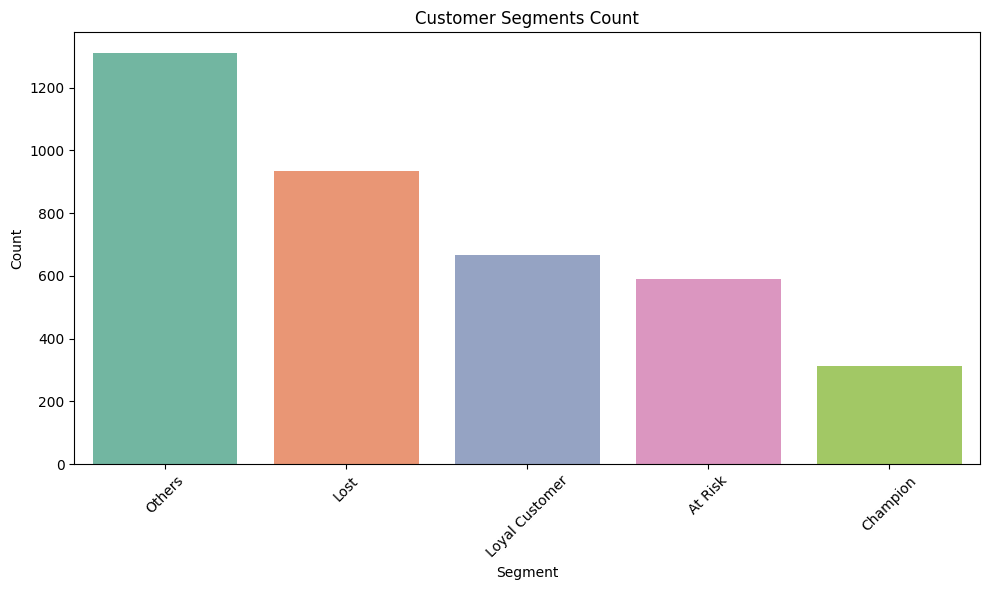

In [27]:
#Step 8: Bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_counts, x='Segment', y='Count', palette='Set2')
plt.title('Customer Segments Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



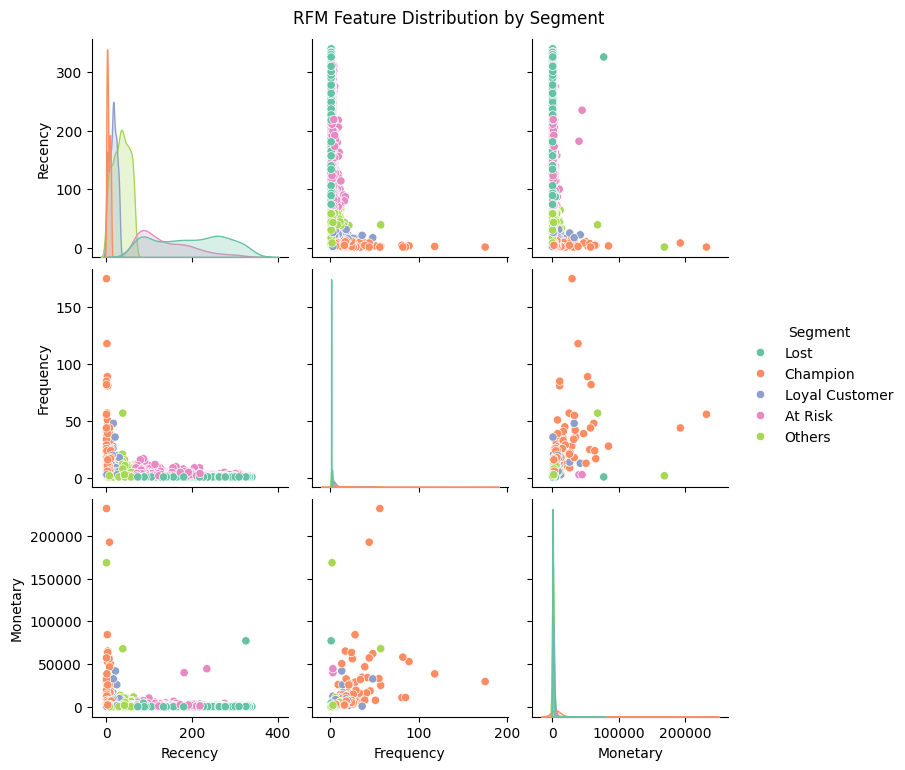

In [28]:
#Step 9: Pairplot RFM with segment
sns.pairplot(rfm.reset_index()[['Recency', 'Frequency', 'Monetary', 'Segment']], hue='Segment', palette='Set2')
plt.suptitle("RFM Feature Distribution by Segment", y=1.02)
plt.show()

In [29]:
#Step 10: Normalize RFM values for clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


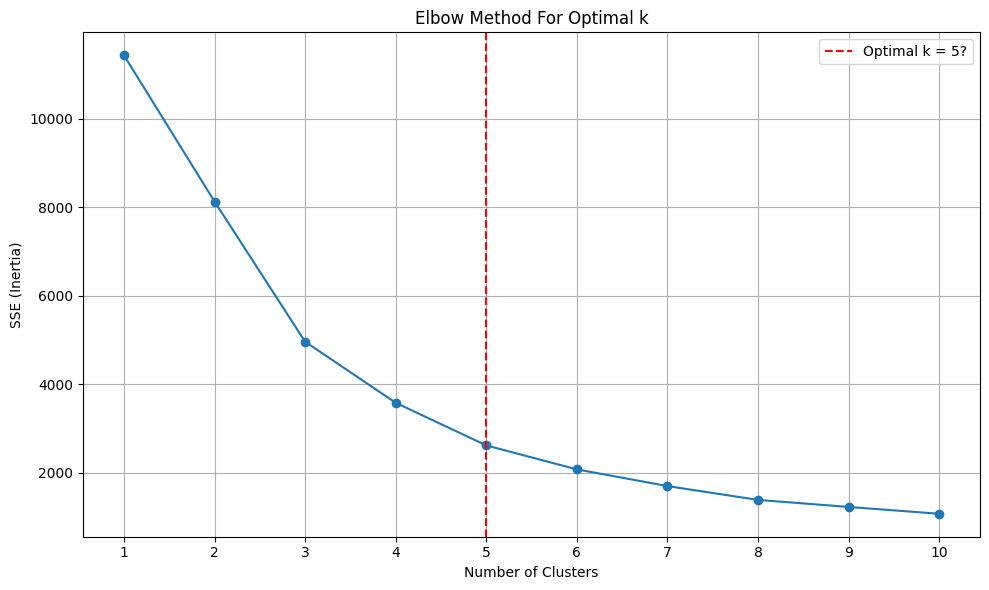

In [30]:
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    sse[k] = kmeans.inertia_

#Plot Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Inertia)')
plt.grid(True)
plt.xticks(range(1, 11))
plt.axvline(x=5, color='red', linestyle='--', label='Optimal k = 5?')
plt.legend()
plt.tight_layout()
plt.show()

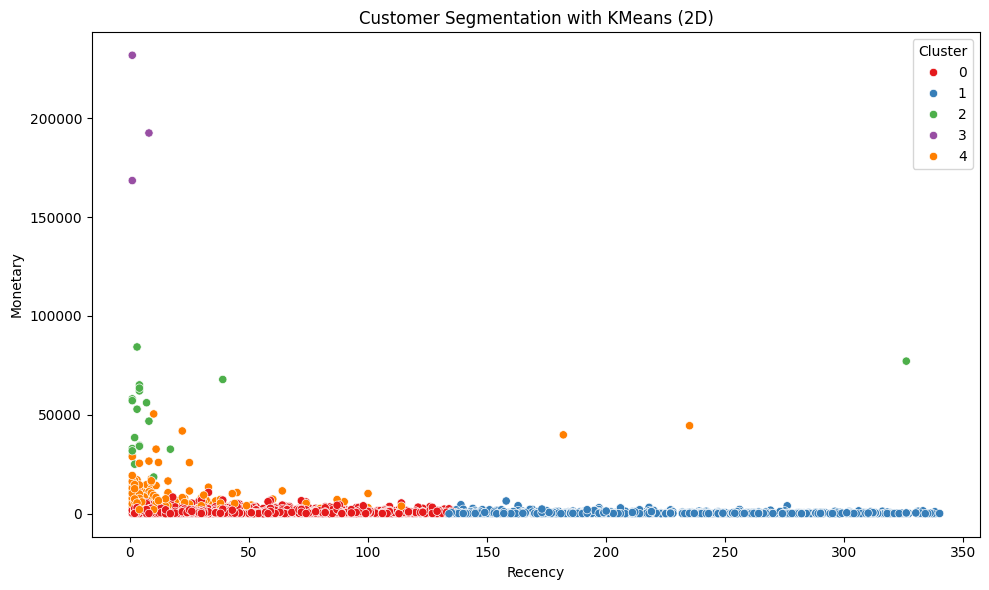

In [31]:
# Apply KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
rfm['KMeans_Cluster'] = kmeans.fit_predict(rfm_scaled)

#Step 13: Visualize KMeans clusters in 2D (Recency vs Monetary)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='KMeans_Cluster', palette='Set1')
plt.title('Customer Segmentation with KMeans (2D)')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [34]:
# 📊 Step 14: 3D plot of KMeans clusters using Plotly
fig = px.scatter_3d(
    rfm.reset_index(),
    x='Recency',
    y='Frequency',
    z='Monetary',
    color='KMeans_Cluster',
    title='Customer Segmentation using KMeans (3D)',
    opacity=0.8
)
fig.show()

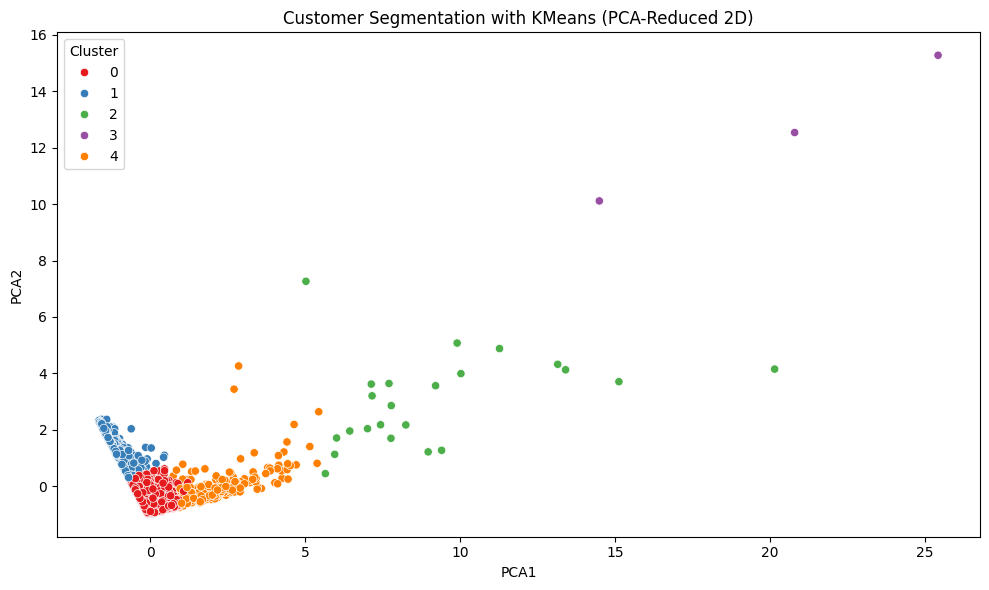

Explained variance by PCA components: [0.54594681 0.29745044]


In [37]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(rfm_scaled)

# Add PCA components to dataframe
rfm['PCA1'] = pca_components[:, 0]
rfm['PCA2'] = pca_components[:, 1]

# Plot clusters using PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='Set1')
plt.title('Customer Segmentation with KMeans (PCA-Reduced 2D)')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()
print("Explained variance by PCA components:", pca.explained_variance_ratio_)



In [33]:
# 📊 Step 15: Compare Manual Segments vs. KMeans Clusters
cross_tab = pd.crosstab(rfm['Segment'], rfm['KMeans_Cluster'])
print("Cross Tabulation between Manual Segments and KMeans Clusters:")
display(cross_tab.style.background_gradient(cmap='Blues'))

Cross Tabulation between Manual Segments and KMeans Clusters:


KMeans_Cluster,0,1,2,3,4
Segment,,,,,
At Risk,331,248,0,0,10
Champion,103,0,20,2,187
Lost,266,669,1,0,0
Loyal Customer,581,0,1,0,84
Others,1286,0,1,1,23
